# Projet Simulation et méthodes Monte Carlo - Stratification

Always make sure you have assessed in some way the numerical error of
your estimates (e.g. through box-plots over repeated runs for instance).

### Import des librairies nécessaires

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import qmc
import itertools
import scipy.stats as stats


### Définition de la fonction f(.)

In [3]:
def f(u):
    d = len(u[0])
    return 1 + np.sin(2*np.pi*(np.sum(u, axis=1)/d - 0.5))


# 1ère partie : Estimation par MC et QMC

## Estimation par méthode Monte Carlo 

In [4]:
def monte_carlo_integration(d,Ns):
    samples = np.random.uniform(0, 1, size=(Ns,d))
    values = f(samples)
    return np.mean(values)


d = 3
nb_ech = 100000
result = monte_carlo_integration(d, nb_ech)
print("Estimated value of the integral for d={} is {:.6f}".format(d, result))

Estimated value of the integral for d=3 is 1.001459


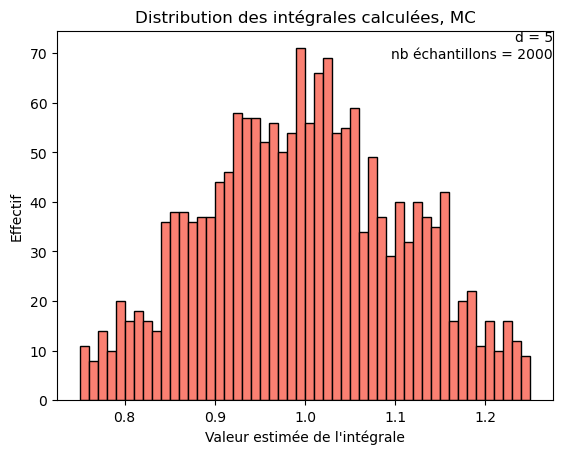

In [34]:
d = 5  # dimension de l'espace d'intégration
num_samples = 2000
plt_vals = []

for i in range(num_samples):
    result = monte_carlo_integration(d, i+1)
    plt_vals.append(result)

plt.title("Distribution des intégrales calculées, MC")
plt.hist (plt_vals, color = 'salmon', ec="black", bins=50, range=(0.75,1.25)) 
plt.xlabel("Valeur estimée de l'intégrale")
plt.ylabel("Effectif")
plt.text(1.0, 1.0, f'd = {d}\nnb échantillons = {num_samples}', ha='right', va='top', transform=plt.gca().transAxes)
plt.show()

## Estimation par méthode Quasi Monte Carlo

On utilise la suite de Sobol puis aussi de Halton 

### Version avec Sobol

In [6]:
def quasi_monte_carlo1(d, num_samples):
    samples = stats.qmc.Sobol(d).random(num_samples)
    values = f(samples)
    return np.mean(values)

d = 2
num_samples = 1000
result1 = quasi_monte_carlo1(d, num_samples)
print("Estimated value of the integral for d={} is {:.6f}".format(d, result1))

Estimated value of the integral for d=2 is 1.001492


c:\Users\blaze\anaconda3\lib\site-packages\scipy\stats\_qmc.py:763: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


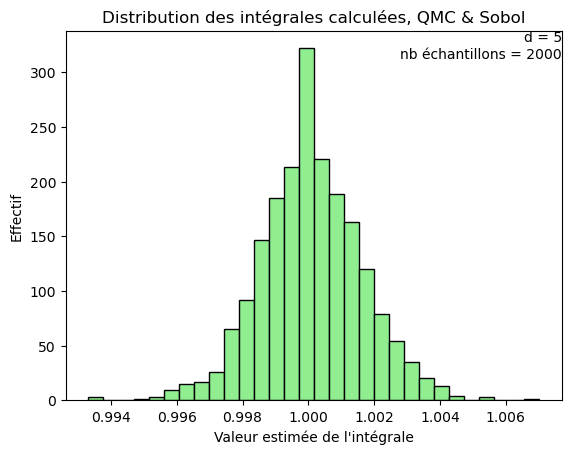

In [35]:
# limits of integration
d = 5
N = 2000

# list to store all the values for plotting 
plt_vals = []

# we iterate through all the values to generate 
# multiple results and show whose intensity is 
# the most.
for i in range(N):
    result = quasi_monte_carlo1(d, num_samples=1000)
    plt_vals.append(result)




plt.hist (plt_vals, bins=30, color='lightgreen', edgecolor='black') 
plt.title("Distribution des intégrales calculées, QMC & Sobol")
plt.xlabel("Valeur estimée de l'intégrale")
plt.ylabel("Effectif")
plt.text(1.0, 1.0, f'd = {d}\nnb échantillons = {N}', ha='right', va='top', transform=plt.gca().transAxes)
plt.show() # shows the plot 

Approximate the integral of f using standard Monte Carlo and quasi-Monte Carlo,
and compare the results, for different values of d (and different Monte Carlo sample
sizes!).
= bon là il faudrait tracer pour plusieurs paramètres, on peut comparer les résultats a chaque fois en faisant des stats des ou jsp en calculant des ratios (je maitrise pas encore le cours mdrr)

In [41]:
def MSE(d,nb_ech,nb_estimation):
    somme_MC=0
    somme_QMC=0
    for i in range(nb_estimation):
        err_QMC=(1- quasi_monte_carlo1(d,nb_ech))**2
        somme_QMC+=err_QMC
    MSE_QMC=somme_QMC/nb_estimation
    for i in range(nb_estimation):
        err_MC=(1- monte_carlo_integration(d,nb_ech))**2
        somme_MC+=err_MC
    MSE_MC=somme_MC/nb_estimation
    return "MSE_MC = "+str(MSE_MC)+" et MSE_QMC = "+str(MSE_QMC)
MSE(4,10000,1000)

'MSE_MC = 0.0012791370686122386 et MSE_QMC = 9.108627046813747e-09'

pour d=1,nb_ech=10000,nb_estimation=1000:
'MSE_MC = 5.1693700623336035e-05 et MSE_QMC = 8.652818054142973e-33'
pour d=2,nb_ech=10000,nb_estimation=1000:
'MSE_MC = 5.129406317276329e-05 et MSE_QMC = 2.2707414078034938e-08'
pour d=3,nb_ech=10000,nb_estimation=1000:
'MSE_MC = 4.871579701648471e-05 et MSE_QMC = 2.6646164250900025e-08'
pour d=4,nb_ech=10000,nb_estimation=1000:
'MSE_MC = 4.212261652583748e-05 et MSE_QMC = 2.5143801021226344e-08'


In [9]:
def CI(d,nb_estimation):
    MC=f(np.random.uniform(0, 1, size=(nb_estimation,d)))
    halton_seq = qmc.Halton(d)
    samples = halton_seq.random(nb_estimation)
    QMC=f(samples)
    MC_est=monte_carlo_integration(d,nb_estimation)
    QMC_est=quasi_monte_carlo1(d,nb_estimation)
    MC_se=np.std(MC)/np.sqrt(nb_estimation)
    QMC_se=np.std(QMC)/np.sqrt(nb_estimation)
    MC_CI = stats.norm.interval(0.95, loc=MC_est, scale=MC_se)
    QMC_CI = stats.norm.interval(0.95, loc=QMC_est, scale=QMC_se)
    return "CI_MC = "+str(MC_CI)+" et CI_QMC = "+str(QMC_CI)
CI(2,10000)
    

'CI_MC = (0.9895901218446862, 1.017276344951212) et CI_QMC = (0.9860966939611194, 1.0138098188370586)'

### Version avec Halton : 

## faire les comparaisons comme au dessus

The choice between Sobol and Halton sequences depends on the specific requirements of your problem and the characteristics of the sequences themselves. Here are some key points to consider:

- Sobol sequences are more effective than Halton sequences at higher dimensions (i.e., when the number of dimensions is greater than about 10). This is because Sobol sequences have better "discrepancy properties", which means that they fill the space more evenly, reducing the number of points required to achieve a certain level of accuracy. Halton sequences can suffer from "clustering" in high dimensions, where many points are concentrated in a few areas of the space.

- Halton sequences are generally simpler to generate and use, since they involve just a simple base conversion algorithm (which can be implemented using standard libraries such as NumPy or MATLAB). Sobol sequences are more complex to generate, and may require specialized libraries or software.

- Both sequences have similar performance in lower dimensions (i.e., up to about 10 dimensions), so the choice between them may not matter much in these cases. In fact, Halton sequences may be slightly better than Sobol sequences in lower dimensions, especially for certain types of problems (such as those involving integrals with singularities).

- Halton sequences are deterministic, meaning that given a specific base sequence, they will always generate the same sequence of points. Sobol sequences, on the other hand, are quasi-random, meaning that they depend on a set of "direction numbers" that can be randomized or scrambled to generate different sequences. This can be useful for some applications (such as Monte Carlo simulations), where it is desirable to generate multiple independent sequences for statistical purposes.

Overall, both Sobol and Halton sequences have their strengths and weaknesses, and the choice between them depends on the specific needs of your problem. It may be useful to try both and compare their performance for your specific application.

In [10]:
def quasi_monte_carlo2(d, num_samples):
    samples = stats.qmc.Halton(d).random(num_samples)
    values = f(samples)
    return np.mean(values)

d = 2
num_samples = 1000
result1 = quasi_monte_carlo2(d, num_samples)
print("Estimated value of the integral for d={} is {:.6f}".format(d, result1))

Estimated value of the integral for d=2 is 0.999244


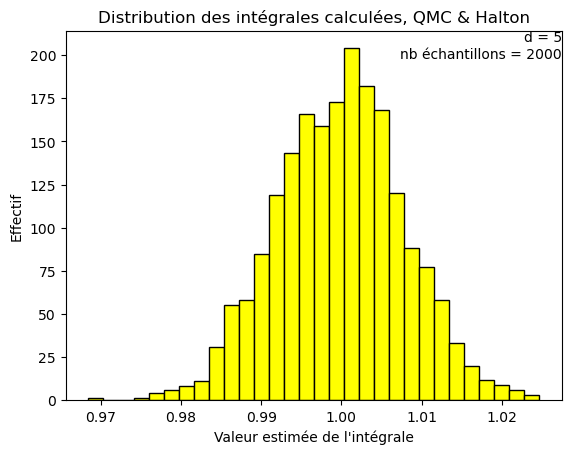

In [43]:
# limits of integration
d = 5
N = 2000

# list to store all the values for plotting 
plt_vals = []

# we iterate through all the values to generate 
# multiple results and show whose intensity is 
# the most.
for i in range(N):
    result = quasi_monte_carlo2(d, num_samples=1000)
    plt_vals.append(result)




plt.hist (plt_vals, bins=30, color='yellow', edgecolor='black') 
plt.title("Distribution des intégrales calculées, QMC & Halton")
plt.xlabel("Valeur estimée de l'intégrale")
plt.ylabel("Effectif")
plt.text(1.0, 1.0, f'd = {d}\nnb échantillons = {N}', ha='right', va='top', transform=plt.gca().transAxes)
plt.show() # shows the plot 

In [12]:
def MSE(d,nb_ech,nb_estimation):
    somme_MC=0
    somme_QMC=0
    for i in range(nb_estimation):
        err_QMC=(1- quasi_monte_carlo2(d,nb_ech))**2
        somme_QMC+=err_QMC
    MSE_QMC=somme_QMC/nb_estimation
    for i in range(nb_estimation):
        err_MC=(1- monte_carlo_integration(d,nb_ech))**2
        somme_MC+=err_MC
    MSE_MC=somme_MC/nb_estimation
    return "MSE_MC = "+str(MSE_MC)+" et MSE_QMC = "+str(MSE_QMC)
MSE(4,10000,1000)

'MSE_MC = 4.2564619827421554e-05 et MSE_QMC = 2.5972535415072208e-08'

In [13]:
def CI(d,nb_estimation):
    MC=f(np.random.uniform(0, 1, size=(nb_estimation,d)))
    halton_seq = qmc.Halton(d)
    samples = halton_seq.random(nb_estimation)
    QMC=f(samples)
    MC_est=monte_carlo_integration(d,nb_estimation)
    QMC_est=quasi_monte_carlo2(d,nb_estimation)
    MC_se=np.std(MC)/np.sqrt(nb_estimation)
    QMC_se=np.std(QMC)/np.sqrt(nb_estimation)
    MC_CI = stats.norm.interval(0.95, loc=MC_est, scale=MC_se)
    QMC_CI = stats.norm.interval(0.95, loc=QMC_est, scale=QMC_se)
    return "CI_MC = "+str(MC_CI)+" et CI_QMC = "+str(QMC_CI)
CI(2,10000)
    

'CI_MC = (0.9864551929581236, 1.0140678576640698) et CI_QMC = (0.9861376297273099, 1.0138514264417586)'

# 2ème partie : Implémentation des estimateurs d'ordre 1 et 2 d'Haber


##  2.1 : Estimateur d'Haber d'ordre 1 

In [14]:
r = 1
m = 0
s = 9

def C(k, s):
    C = []  # Liste pour stocker les ensembles ((2j1+1)/2k, ..., (2js+1)/2k)

    for j in itertools.product(range(k), repeat=s):
        Cj = [(2*j[i]+1)/(2*k) for i in range(s)]
        C.append(tuple(Cj))

    return C
#en vrai jsp si c la bonne solution,  a premiere vue ca m'a l'air ok mais bon


def haberordre1(s, k, f) : 
    n = k**s
    Uc = [random.uniform(-1/(2*k), 1/(2*k)) for i in range(s)]
    I = 0
    for c in C(k) :
        I += f(c + Uc)
    I = I / n
    return I


In [15]:
#C(3, s)

## 2.2 : Estimateur d'Haber d'ordre 2

In [16]:
def gc(u,f) :  
    g = (f(c+u) + f(c - u)) / 2

def haberordre2(s, k, f) : 
    n = 2*k**s
    Uc = [random.uniform(-1/(2*k), 1/(2*k)) for i in range(s)]
    I = 0
    for c in C(k) :
        I += gc(Uc)
    I = I / n
    return I

In [17]:
def f(u):
    d = len(u[0])
    return 1 + np.sin(2*np.pi*(np.sum(u)/d - 0.5))
np.sum(np.random.uniform(0, 1, size=(20,2)))

20.702616044887094

c:\Users\blaze\anaconda3\lib\site-packages\scipy\stats\_qmc.py:763: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


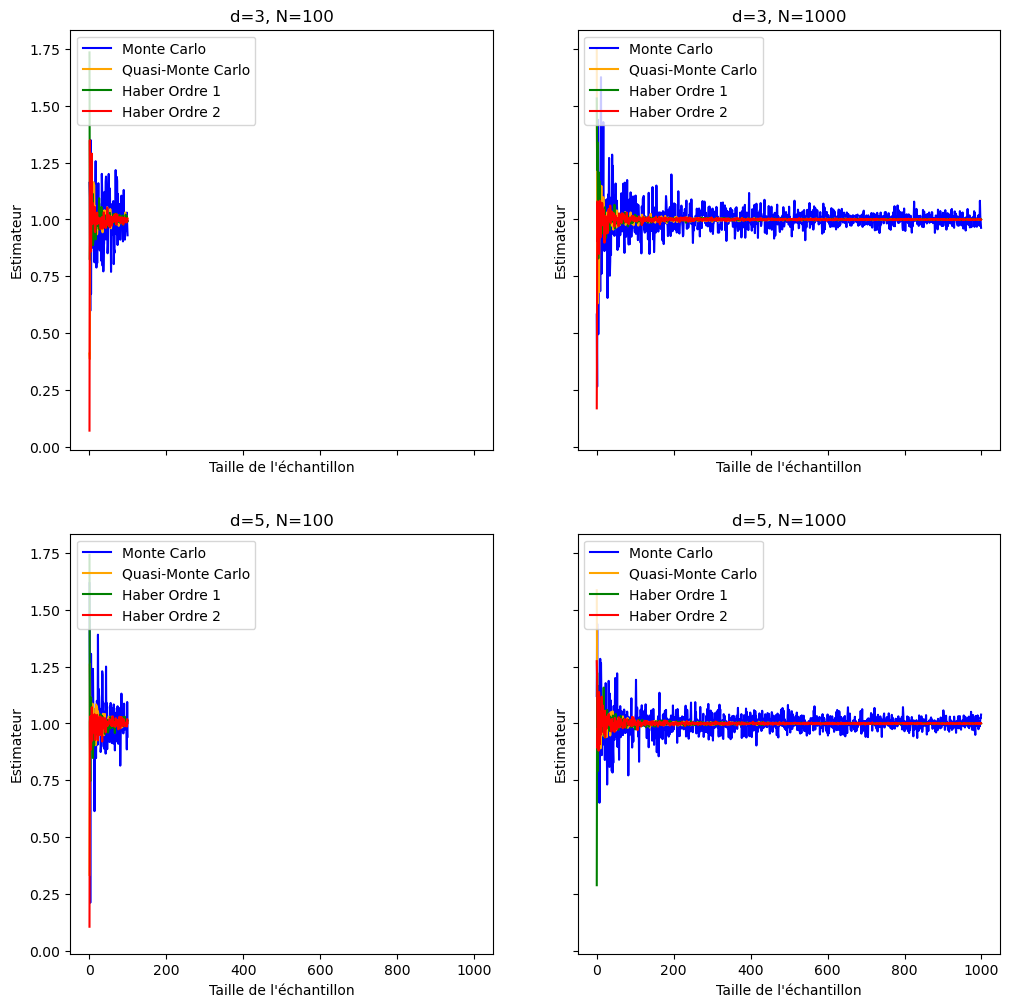

In [44]:
def f(u):
    d = len(u[0])
    return 1 + np.sin(2*np.pi*(np.sum(u,axis=1)/d - 0.5))

def monte_carlo(d, Ns):
    estimates = []
    for N in Ns:
        samples = np.random.uniform(0, 1, size=(N,d))
        values = f(samples)
        estimate = np.mean(values)
        estimates.append(estimate)
    return estimates

def quasi_monte_carlo(d, Ns):
    estimates = []
    for N in Ns:
        samples = stats.qmc.Sobol(d).random(N)
        values = f(samples)
        estimate = np.mean(values)
        estimates.append(estimate)
    return estimates

def haber_ordre1(d, Ns):
    estimates = []
    for N in Ns:
        samples = stats.qmc.Sobol(d).random(N)
        values = f(samples)
        diffs = np.subtract.outer(values, values)
        estimate = np.mean(values) + 0.5*np.mean(diffs)
        estimates.append(estimate)
    return estimates

def haber_ordre2(d, Ns):
    estimates = []
    for N in Ns:
        samples = stats.qmc.Sobol(d).random(N)
        values = f(samples)
        diffs = np.subtract.outer(values, values)
        squares = np.square(diffs)
        estimate = np.mean(values) + 0.5*np.mean(diffs) + (1/3)*np.mean(squares*diffs)
        estimates.append(estimate)
    return estimates

# limits of integration
a = 0
b = 1
ds = [3, 5]
Ns = [100, 1000]
methods = [monte_carlo, quasi_monte_carlo, haber_ordre1, haber_ordre2]
labels = ["Monte Carlo", "Quasi-Monte Carlo", "Haber Ordre 1", "Haber Ordre 2"]
colors = ["blue", "orange", "green", "red"]

fig, axs = plt.subplots(len(ds), len(Ns), figsize=(12, 12), sharex=True, sharey=True)

for i, d in enumerate(ds):
    for j, N in enumerate(Ns):
        for k, method in enumerate(methods):
            estimates = method(d, range(1, N+1))
            axs[i, j].plot(estimates, color=colors[k])
            axs[i, j].set_title("d={}, N={}".format(d, N))
            axs[i, j].set_xlabel("Taille de l'échantillon")
            axs[i, j].set_ylabel("Estimateur")
            axs[i, j].legend(labels, loc="upper left")

#plt.tight_layout()
#plt.show()


Estimated value of the integral for Monte Carlo is 1.009055
Estimated value of the integral for Quasi-Monte Carlo is 0.999986
Estimated value of the integral for Haber Order 1 is 0.999991
Estimated value of the integral for Haber Order 2 is 0.999997


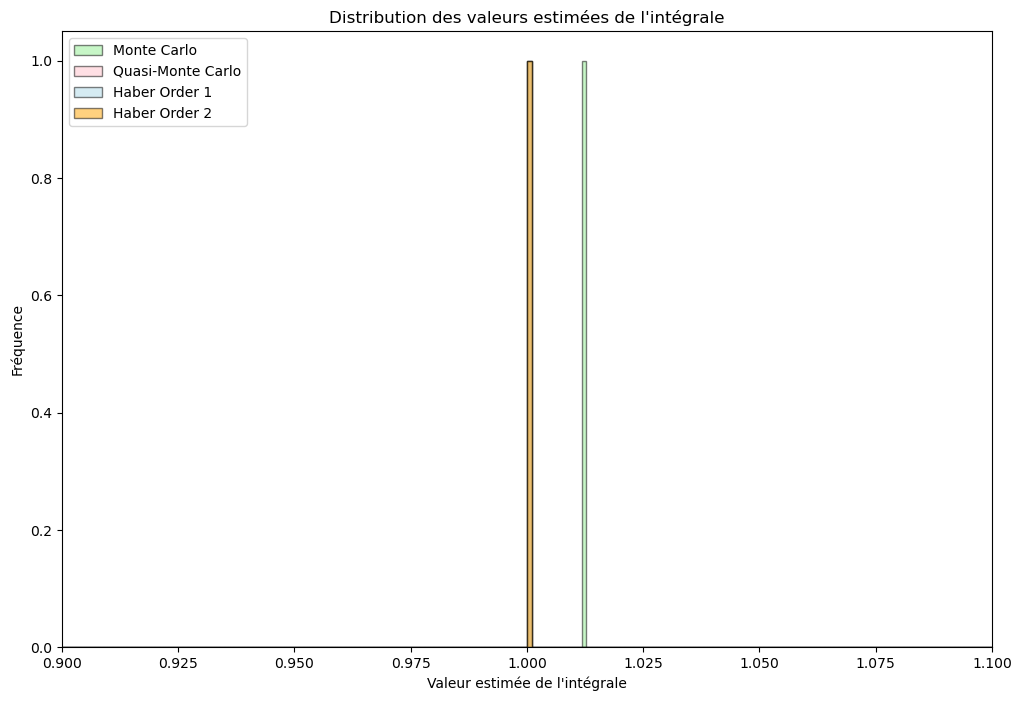

In [19]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import itertools

def f(u):
    d = len(u[0])
    return 1 + np.sin(2*np.pi*(np.sum(u, axis=1)/d - 0.5))

def monte_carlo_integration(d, num_samples):
    samples = np.random.rand(num_samples, d)
    values = f(samples)
    return np.mean(values)

def quasi_monte_carlo(d, num_samples):
    samples = stats.qmc.Sobol(d).random(num_samples)
    values = f(samples)
    return np.mean(values)

def haber_order1_integration(d, num_samples):
    samples = stats.qmc.Sobol(d).random(num_samples)
    values = f(samples)
    diffs = np.subtract.outer(values, values)
    return np.mean(values) + 0.5*np.mean(diffs)

def haber_order2_integration(d, num_samples):
    samples = stats.qmc.Sobol(d).random(num_samples)
    values = f(samples)
    diffs = np.subtract.outer(values, values)
    squares = np.square(diffs)
    return np.mean(values) + 0.5*np.mean(diffs) + (1/3)*np.mean(squares*diffs)

# limits of integration
d = 8
N = 10000

# list of integration methods to try
methods = [monte_carlo_integration, quasi_monte_carlo, haber_order1_integration, haber_order2_integration]
labels = ["Monte Carlo", "Quasi-Monte Carlo", "Haber Order 1", "Haber Order 2"]

# compute values for each method
plt_vals1 = monte_carlo_integration(d, num_samples=N)
plt_vals2 = quasi_monte_carlo(d, num_samples=N)
plt_vals3 = haber_order1_integration(d, num_samples=N)
plt_vals4 = haber_order2_integration(d, num_samples=N)

plt_vals = []
for method in methods:
    result = method(d, num_samples=N)
    plt_vals.append(result)
    print("Estimated value of the integral for {} is {:.6f}".format(labels[methods.index(method)], result))

# set up colors for plotting
colors = itertools.cycle(['lightgreen', 'pink', 'lightblue', 'orange'])

# plot the histograms
fig, axs = plt.subplots(figsize=(12, 8))
axs.hist(plt_vals1, bins=1000, color=next(colors), edgecolor='black', alpha=0.5)
axs.hist(plt_vals2, bins=1000, color=next(colors), edgecolor='black', alpha=0.5)
axs.hist(plt_vals3, bins=1000, color=next(colors), edgecolor='black', alpha=0.5)
axs.hist(plt_vals4, bins=1000, color=next(colors), edgecolor='black', alpha=0.5)
axs.set_title("Distribution des valeurs estimées de l'intégrale")
axs.set_xlabel("Valeur estimée de l'intégrale")
axs.set_ylabel("Fréquence")
axs.legend(labels, loc="upper left")
axs.set_xlim(0.9, 1.1)
plt.show()


In [20]:
def MSE2(d,nb_ech,nb_estimation):
    somme_MC=0
    somme_QMC=0
    somme_haber1=0
    somme_haber2=0
    for i in range(nb_estimation):
        err_QMC=(1- quasi_monte_carlo(d,nb_ech))**2
        somme_QMC+=err_QMC
    MSE_QMC=somme_QMC/nb_estimation
    for i in range(nb_estimation):
        err_MC=(1- monte_carlo_integration(d,nb_ech))**2
        somme_MC+=err_MC
    MSE_MC=somme_MC/nb_estimation
    for i in range(nb_estimation):
        err_haber1=(1- haber_order1_integration(d,nb_ech))**2
        somme_haber1+=err_haber1
    MSE_haber1=somme_haber1/nb_estimation
    for i in range(nb_estimation):
        err_haber2=(1- haber_order2_integration(d,nb_ech))**2
        somme_haber2+=err_haber2
    MSE_haber2=somme_haber2/nb_estimation
    return "MSE_MC = "+str(MSE_MC)+" et MSE_QMC = "+str(MSE_QMC)+" et MSE_haber1 = "+str(MSE_haber1)+" et MSE_haber2 = "+str(MSE_haber2)
MSE2(2,1000,1000)

'MSE_MC = 0.0005337293996240435 et MSE_QMC = 7.010236119992318e-07 et MSE_haber1 = 6.77762344704739e-07 et MSE_haber2 = 6.859386178409692e-07'

In [21]:
MSE2(3,1000,1000)

'MSE_MC = 0.0004961469531687727 et MSE_QMC = 7.123795380131077e-07 et MSE_haber1 = 7.851707632170895e-07 et MSE_haber2 = 7.037898092673154e-07'

In [22]:
MSE2(4,1000,1000)

'MSE_MC = 0.00036962772392457223 et MSE_QMC = 5.530625702679757e-07 et MSE_haber1 = 6.457960292884427e-07 et MSE_haber2 = 6.191053142241883e-07'

In [23]:
MSE2(5,1000,1000)

'MSE_MC = 0.00040624214471453454 et MSE_QMC = 5.283617746032981e-07 et MSE_haber1 = 5.583456739278164e-07 et MSE_haber2 = 5.489300604167693e-07'

In [24]:
import numpy as np
from scipy import stats

def CI_MC_1(k, s, nb_estimation):
    def f(x):
        return np.exp(-(sum((x[i]-m)**2 for i in range(s)))/s/(2*r**2))

    def monte_carlo_integration_1(s, nb_estimation):
        X = np.random.normal(m, r, size=(nb_estimation, s))
        return np.mean(f(X))

    MC_est = monte_carlo_integration_1(s, nb_estimation)
    MC_se = np.std(f(np.random.normal(m, r, size=(nb_estimation, s)))) / np.sqrt(nb_estimation)
    MC_CI = stats.norm.interval(0.95, loc=MC_est, scale=MC_se)
    return "CI_MC_1 = " + str(MC_CI)



def gc(c, u, f):
    return (f(np.array(c)+np.array(u)) + f(np.array(c)-np.array(u))) / 2

def monte_carlo_integration_2(s, k, nb_estimation, f):
    n = 2*k**s
    I = 0
    for c in C(k, s):
        Uc = [np.random.uniform(-1/(2*k), 1/(2*k)) for i in range(s)]
        I += gc(c, Uc, f)
    I = I / n
    return I

def CI_MC_2(k, s, nb_estimation):
    def f(x):
        return np.exp(-(sum((x[i]-m)**2 for i in range(s)))/s/(2*r**2))

    MC_est = monte_carlo_integration_2(s, k, nb_estimation, f)
    MC_se = np.std([monte_carlo_integration_2(s, k, nb_estimation, f) for _ in range(10)]) / np.sqrt(nb_estimation)
    MC_CI = stats.norm.interval(0.95, loc=MC_est, scale=MC_se)
    return "CI_MC_2 = " + str(MC_CI)

CI_MC_1(2,5,10000) , CI_MC_2(2,5,10000)

('CI_MC_1 = (0.5882364061206942, 0.5926713211845809)',
 'CI_MC_2 = (0.4242904156983605, 0.4242988804984868)')

# 3. Réponse à la question par Importance Sampling

cf explications de Samy

In [25]:
def f1(x) : 
    return abs(x)

def f2(x) : 
    return x - abs(x)

In [26]:
import numpy as np
from scipy.stats import norm

def f(u):
    d = u.shape[0]
    return 1 + np.sin(2*np.pi*np.sum(u)/d)

# Nombre d'échantillons et de dimensions
N = 10000
d = 2

# Définition des fonctions f1 et f2
f1 = lambda x: np.abs(x)
f2 = lambda x: x - np.floor(x)

# Loi Z1
Z1 = (f1(norm.rvs(size=(N,d))) + f2(norm.rvs(size=(N,d))))/2
p1 = ((2-4*Z1)*(Z1>=0)*(Z1<=0.5) + (4*Z1-2)*(Z1>0.5)*(Z1<=1))
w1 = np.exp(-np.sum(Z1**2/2, axis=1) + np.sum(norm.logpdf(Z1), axis=1)) / np.sum(p1, axis=1)

# Loi Z2
Z2 = np.random.uniform(size=(N,d))
w2 = np.ones(N)

# Calcul de l'intégrale
X = np.concatenate((Z1, Z2), axis=0)
w = np.concatenate((w1, w2), axis=0)
w = w/np.sum(w)
I = np.mean(f(X)*w)

print('Intégrale:', I)


Intégrale: nan


C:\Users\blaze\AppData\Local\Temp\ipykernel_45640\2104338221.py:19: RuntimeWarning: divide by zero encountered in divide
  w1 = np.exp(-np.sum(Z1**2/2, axis=1) + np.sum(norm.logpdf(Z1), axis=1)) / np.sum(p1, axis=1)
C:\Users\blaze\AppData\Local\Temp\ipykernel_45640\2104338221.py:28: RuntimeWarning: invalid value encountered in divide
  w = w/np.sum(w)


In [27]:
import numpy as np
from scipy.stats import uniform

def f(u):
    d = u.shape[0]
    return 1 + np.sin(2*np.pi*(np.sum(u)/d - 0.5))

# Nombre d'échantillons et de dimensions
N = 10000
d = 3

# Définition de la fonction g
g = lambda x: x - np.floor(x)

# Définition de la densité z
def z(x):
    if x < 0 or x > 1:
        return 0
    elif x <= 0.5:
        return 2 - 4*x
    else:
        return 4*x - 2

# Loi Z
Z = np.zeros((N, d))
for j in range(d):
    Z[:,j] = uniform.rvs(size=N)
    Z[:,j] = g(Z[:,j])

w = np.ones(N)
for i in range(N):
    for j in range(d):
        w[i] *= z(Z[i,j])
        
# Calcul de l'intégrale
X = Z
w = w/np.sum(w)
I = np.mean(f(X)*w)

print('Intégrale:', I)


Intégrale: 0.00010032967647491631


In [28]:
import numpy as np
from scipy.stats import uniform

def f(u):
    d = u.shape[0]
    return 1 + np.sin(2*np.pi*(np.sum(u)/d - 0.5))

# Nombre d'échantillons et de dimensions
N = 10000
d = 10

# Définition de la densité z
z = lambda x: (2-4*x)*(x>=0)*(x<=0.5) + (4*x-2)*(x>0.5)*(x<=1)

# Tirage des échantillons suivant la densité z
U = uniform.rvs(size=(N,d))
X = (U*z(U))/z(U)
w = 1/(N*z(X))


# Calcul de l'intégrale
I = np.mean(f(X)*w)

print('Intégrale:', I)


Intégrale: 0.0012030983671557863
